In [34]:
import os
import torch
import pandas as pd
import numpy as np
import torchvision
import torch.nn as nn
from torch.utils.data import Dataset, random_split, DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import matplotlib.pyplot as plt
from collections import OrderedDict
%matplotlib inline
import warnings
#from google.colab import drive
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.image")
# Montar o Google Drive
#drive.mount('/content/drive')

In [35]:
# DIRETORIOS
TRAIN_DIR = "train"
TEST_DIR =  "test"
LABELS_DIR = "labels.csv"

DATA_DF = pd.read_csv(LABELS_DIR)
DATA_DF.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [36]:
# TRANSFORMANDO OS LABELS EM TIPOS INTEIROS
unique_values = DATA_DF['breed'].unique()

mapping = {val: i for i, val in enumerate(unique_values)}
DATA_DF['breed'] = DATA_DF['breed'].map(mapping)
DATA_DF['breed'] = DATA_DF['breed'].astype(int)
CLASSES = DATA_DF['breed'].unique()
print(CLASSES)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]


In [62]:
# DIVIDINDO DADOS ENTRE TREINO E VALIDAÇÃO
np.random.seed(42)
msk = np.random.rand(len(DATA_DF)) < 0.8

train_df = DATA_DF[msk].reset_index()
val_df = DATA_DF[~msk].reset_index()

print(f"Dados de treino: {len(train_df)}")
print(f"Dados de validação {len(val_df)}")

# Transformando labels em inteiros

Dados de treino: 8221
Dados de validação 2001


In [63]:
class DogBreedDataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.df = df
        self.transform = transform
        self.root_dir = root

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_id, img_label = self.df.loc[idx]['id'], self.df.loc[idx]['breed']
        img_fname = self.root_dir + "/" + str(img_id) + ".jpg"
        img = Image.open(img_fname)
        if self.transform:
            img = self.transform(img)
        return img, img_label

In [57]:
#TRANSFORMAÇÕES
mean = [0.485, 0.456, 0.406]
dtd = [0.229, 0.224, 0.225]

#mean = [0.5, 0.5, 0.5]
#dtd = [0.5, 0.5, 0.5]

# Transformações de treino
train_transform = transforms.Compose([   
    transforms.RandomResizedCrop(size=256, scale=(0.95, 1.0)),
    transforms.RandomRotation(15),
    transforms.CenterCrop(size=224),
    transforms.ColorJitter(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, dtd)
])

# Transformações de validação
val_transforms = transforms.Compose([transforms.RandomResizedCrop(size=256, scale=(0.95, 1.0)), transforms.CenterCrop(size=224),transforms.ToTensor(),transforms.Normalize(mean, dtd)])

In [64]:
# Tamanho do lote de imagens
BATCH = 30

# DATASETS DE TREINO E VALIDAÇÃO
train_dataset = DogBreedDataset(train_df, TRAIN_DIR, transform=train_transform)
val_dataset = DogBreedDataset(val_df, TRAIN_DIR, transform=val_transforms)

# DATA LOADERS DE TREINO, VALIDAÇÃO E TESTE
train_loader = DataLoader(train_dataset, batch_size=BATCH, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

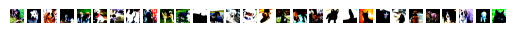

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

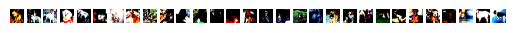

In [65]:
def show_batch(dl, n=BATCH):

    for i, (imgs, labels) in enumerate(dl):

        for j in range(min(n, len(imgs))):
            img = imgs[j]
            label = labels[j]
            plt.subplot(1, n, j+1)
            plt.imshow(img.permute(1, 2, 0))
            plt.axis('off')
        plt.show()
        break

show_batch(train_loader)
show_batch(val_loader)

In [226]:
# Definindo a arquitetura da CNN para transfer learning
# base_model -> Modelo base
# base_out_features -> N° de classes de saida do modelo base (1000)
# num_classes -> N° de classes que o problema possui (120)
class CNN(nn.Module):
      def __init__(self, base_model, base_out_features, num_classes):
        super(CNN, self).__init__()
        self.base_model=base_model
        # 1000 -> 512
        self.linear1 = torch.nn.Linear(base_out_features, 512)
        # 512 -> 120
        self.output = torch.nn.Linear(512,num_classes)
      def forward(self,x):
        x = F.relu(self.base_model(x))
        x = F.relu(self.linear1(x))
        x = self.output(x)
        return x

In [227]:
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import models
from torch.optim import lr_scheduler

model_resnet = models.resnet50(weights="IMAGENET1K_V1")
for param in model_resnet.parameters():
    param.requires_grad=False

model = CNN(base_model=model_resnet, base_out_features=model_resnet.fc.out_features, num_classes=len(CLASSES))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [228]:
model_path = "models"
file_name = "dog_breed_model_resnet.pth"
if not os.path.exists(model_path):
  os.makedirs(model_path)


In [ ]:
import time
epochs = 30
min_validation_loss = np.Inf
start_time = time.time()
for epoch in range(epochs):
     training_loss = 0.0
     validation_loss = 0.0

     model.train()
     for data in train_loader:
        inputs, labels = data

        optimizer.zero_grad()

        labels = labels.long()


        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        training_loss += loss.item()*inputs.size(0)


     model.eval()
     correct = 0
     total = 0
   
     for data in val_loader:
          inputs, labels = data
          labels = labels.long()

          outputs = model(inputs)
          loss = criterion(outputs, labels)

          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

          validation_loss += loss.item()*inputs.size(0)

     training_loss = training_loss / len(train_loader.sampler)
     validation_loss = validation_loss / len(val_loader.sampler)
     accuracy = 100 * correct // total
     scheduler.step()
     print(f"Epoca :{epoch+1}", end = "\t")
     print(f"Loss de treino :{training_loss}", end = "\t")
     print(f"Loss de validação :{validation_loss}", end = "\t")
     print(f"Acuracia de: {accuracy} %", end = "\t")

    # Salva o melhor modelo
     if validation_loss <= min_validation_loss:
        print(f"Salvando melhor modelo com loss de {validation_loss}")
        torch.save(model.state_dict(), f"{model_path}/{file_name}")
        min_validation_loss = validation_loss
end_time = time.time()
training_time = end_time - start_time
training_time = end_time - start_time
minutes = int(training_time // 60)
seconds = int(training_time % 60)
print(f'Treino finalizado em: {minutes} minutos e {seconds} segundos')

In [230]:
# CARREGA O MELHOR MODELO
model.load_state_dict(torch.load("models\dog_breed_model_resnet.pth"))
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in val_loader:
        images, labels = data
        labels = labels.long()       
        outputs = model(images)
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Acuracia de: {100 * correct // total} % com um modelo treinado em apenas 17 das 30 épocas.')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\aldoj\AppData\Local\Temp\ipykernel_12684\4183766857.py:1: SyntaxWarning: invalid escape sequence '\d'
  model.load_state_dict(torch.load("models\dog_breed_model_resnet.pth"))


Acuracia de: 83 % com um modelo treinado em apenas 17 das 30 épocas.


In [231]:
# AJUSTANDO O DATAFRAME DE TESTE
SAMPLE_SUBMISSION = pd.read_csv("sample_submission.csv")
SAMPLE_SUBMISSION.head()

TEST_IMAGES = SAMPLE_SUBMISSION[['id']]
TEST_IMAGES.id = TEST_IMAGES.id.apply(lambda x: x+'.jpg')
TEST_IMAGES.id = TEST_IMAGES.id.apply(lambda x : 'test/'+x)
print(TEST_IMAGES)

                                              id
0      test/000621fb3cbb32d8935728e48679680e.jpg
1      test/00102ee9d8eb90812350685311fe5890.jpg
2      test/0012a730dfa437f5f3613fb75efcd4ce.jpg
3      test/001510bc8570bbeee98c8d80c8a95ec1.jpg
4      test/001a5f3114548acdefa3d4da05474c2e.jpg
...                                          ...
10352  test/ffeda8623d4eee33c6d1156a2ecbfcf8.jpg
10353  test/fff1ec9e6e413275984966f745a313b0.jpg
10354  test/fff74b59b758bbbf13a5793182a9bbe4.jpg
10355  test/fff7d50d848e8014ac1e9172dc6762a3.jpg
10356  test/fffbff22c1f51e3dc80c4bf04089545b.jpg

[10357 rows x 1 columns]


C:\Users\aldoj\AppData\Local\Temp\ipykernel_12684\2160694954.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TEST_IMAGES.id = TEST_IMAGES.id.apply(lambda x: x+'.jpg')
C:\Users\aldoj\AppData\Local\Temp\ipykernel_12684\2160694954.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TEST_IMAGES.id = TEST_IMAGES.id.apply(lambda x : 'test/'+x)


In [232]:
class TestDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img = Image.open(self.df.iloc[idx,0])
        if self.transform:
            img = self.transform(img)
        return img
        

In [233]:
test_dataset = TestDataset(TEST_IMAGES, val_transforms)
test_loader = DataLoader(test_dataset, batch_size=BATCH, shuffle=False)

In [234]:
predictions = torch.tensor([])
model.eval()

for data in test_loader:
        outputs = model(data)
        predictions = torch.cat([predictions, outputs])

final_predictions = F.softmax(predictions,dim=1).detach().numpy()
print(final_predictions)
print("Fim..")

[[2.60916788e-10 1.15598356e-11 4.30934271e-03 ... 7.02902071e-07
  3.86493099e-07 1.51562738e-11]
 [2.25861105e-13 1.32093705e-08 5.21449195e-08 ... 2.14968465e-13
  1.97595759e-12 1.55379944e-14]
 [1.41954191e-11 9.26395505e-12 4.34880532e-09 ... 8.74644727e-04
  3.85011255e-04 6.15038784e-11]
 ...
 [8.58895745e-13 2.35968106e-03 8.32841157e-11 ... 5.09908515e-14
  1.58785300e-12 3.97460060e-12]
 [8.74278605e-09 1.42839088e-10 1.70988817e-04 ... 8.60056557e-12
  4.95777329e-07 1.20371354e-07]
 [1.09599716e-08 1.93779997e-05 9.03689624e-07 ... 2.94892698e-06
  1.63879895e-06 7.39781967e-07]]
Fim..


In [236]:
sample_submission = pd.read_csv("sample_submission.csv")
breeds = pd.read_csv("labels.csv").sort_values(by='breed', ascending=True)['breed'].unique()
ids_df = pd.DataFrame(sample_submission['id'], columns=['id'])
breeds_df = pd.DataFrame(final_predictions, columns=breeds)
ids_df.head()
combined_df = pd.concat([ids_df, breeds_df], axis=1)
combined_df.set_index('id', inplace=True)
combined_df.to_csv("submission_resnet.csv")
combined_df.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
id,,,,,,,,,,,,,,,,,,,,,
000621fb3cbb32d8935728e48679680e,2.609168e-10,1.155984e-11,4.309343e-03,5.135682e-10,6.627310e-07,4.350318e-13,7.610577e-05,4.731555e-10,1.283920e-09,5.370124e-03,...,4.384458e-03,5.903253e-08,3.793552e-10,1.154449e-12,4.016461e-10,3.243448e-10,1.557965e-08,7.029021e-07,3.864931e-07,1.515627e-11
00102ee9d8eb90812350685311fe5890,2.258611e-13,1.320937e-08,5.214492e-08,4.427756e-14,1.174436e-07,1.343090e-13,4.060419e-10,1.200004e-09,5.826872e-11,1.562304e-08,...,2.060200e-12,4.854992e-12,1.623672e-15,2.957651e-14,2.042373e-10,8.653238e-13,2.026710e-07,2.149685e-13,1.975958e-12,1.553799e-14
0012a730dfa437f5f3613fb75efcd4ce,1.419542e-11,9.263955e-12,4.348805e-09,1.159033e-06,9.564910e-06,4.960826e-11,2.176045e-05,6.870849e-12,9.462955e-08,3.504390e-08,...,5.141383e-06,1.668630e-08,8.555719e-09,4.036109e-07,1.074654e-11,1.076817e-10,4.821129e-10,8.746447e-04,3.850113e-04,6.150388e-11
001510bc8570bbeee98c8d80c8a95ec1,4.464073e-05,2.621978e-06,1.546273e-03,3.651094e-05,2.139211e-05,3.775851e-07,5.972168e-06,4.110771e-05,3.599801e-06,2.533168e-06,...,5.021440e-06,1.306132e-05,5.436649e-09,6.109452e-06,1.535907e-03,1.590418e-04,7.120708e-03,4.146850e-07,8.190126e-05,4.592280e-04
001a5f3114548acdefa3d4da05474c2e,1.954541e-08,7.923571e-08,9.139831e-05,5.296624e-07,4.288910e-06,2.983903e-07,6.768528e-08,8.250312e-08,4.110711e-06,7.940156e-07,...,1.355336e-05,9.606330e-06,1.794346e-05,2.916936e-09,1.306478e-05,6.050998e-04,1.285477e-02,2.745116e-08,4.539828e-05,2.252377e-07
